In [75]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import nltk
import re
import pickle
import seaborn as sns
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chait\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
spam = pd.read_csv("spam mail.csv")
spam.head()

,Category,Masseges
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
spam.isnull().sum()

Category    0
Masseges    0
dtype: int64

In [23]:
spam.shape

(5572, 2)

In [24]:
spam.columns = ['label', 'message']
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
spam.shape

(5572, 2)

In [26]:
spam.groupby('label').size()

label
ham     4825
spam     747
dtype: int64

<Axes: xlabel='label'>

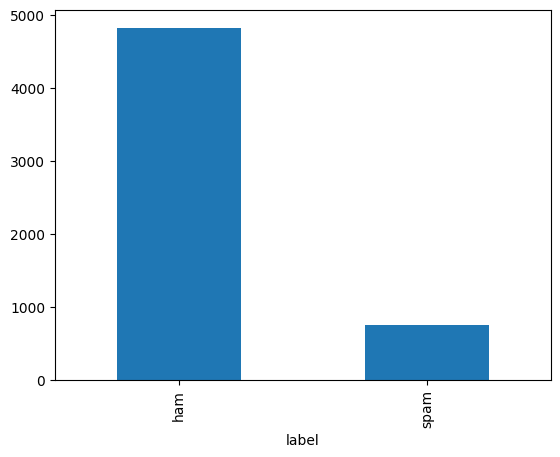

In [27]:
spam['label'].value_counts().plot(kind='bar')

In [33]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


corpus[1:6]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

In [34]:
cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

In [55]:
# Model 1 - Random Forest Classifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

RandomForestClassifier()

In [56]:
# Model 2 - Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

DecisionTreeClassifier()

In [57]:
# Model 3 - Multinomial Naïve Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)

MultinomialNB()

In [61]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

In [59]:
# Model 1- Random Forest Clasifier
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred1))
print("Accuracy: ", accuracy_score(Y_test, pred1))
print("--------------------------------")

Random Forest Classifier
Confusion Matrix: 
[[964   1]
 [ 24 126]]
Accuracy:  0.9775784753363229
--------------------------------


In [62]:
# Model 2 - Decision Tree Classifier
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred2))
print("Accuracy: ", accuracy_score(Y_test, pred2))
print("--------------------------------")


Decision Tree Classifier
Confusion Matrix: 
[[957   8]
 [ 25 125]]
Accuracy:  0.9704035874439462
--------------------------------


In [63]:
# Model 3 - Multinomial Naïve Bayes
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred3))
print("Accuracy: ", accuracy_score(Y_test, pred3))

Multinomial Naïve Bayes
Confusion Matrix: 
[[952  13]
 [  9 141]]
Accuracy:  0.9802690582959641


In [68]:
#predict the labels for the test set
Y_pred = classifier.predict(X_test)
#evaluate the clasifier
accuracy =accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test,Y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9802690582959641
Confusion Matrix:
[[952  13]
 [  9 141]]
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       965
        True       0.92      0.94      0.93       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



<Axes: >

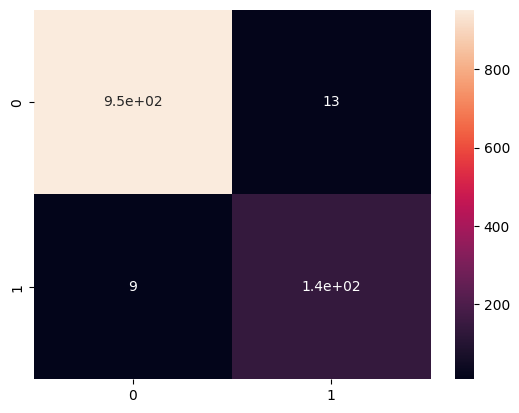

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred3)

import seaborn as sns
sns.heatmap(cm, annot=True)


In [73]:
report1 = classification_report(Y_test, pred1)
print("Classification Report for RFC \n", report1)
report2 = classification_report(Y_test, pred2)
print("Classification Report for DTC \n", report2)
report3 = classification_report(Y_test, pred3)
print("Classification Report for MNB \n", report3)

Classification Report for RFC 
               precision    recall  f1-score   support

       False       0.98      1.00      0.99       965
        True       0.99      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Classification Report for DTC 
               precision    recall  f1-score   support

       False       0.97      0.99      0.98       965
        True       0.94      0.83      0.88       150

    accuracy                           0.97      1115
   macro avg       0.96      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Classification Report for MNB 
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       965
        True       0.92      0.94      0.93       150

    accuracy                           0.98      1115
   macro avg       0.95      0.9

In [76]:
filename = "RFC.pkl"
pickle.dump(model1, open(filename, 'wb'))
filename = "DTC.pkl"
pickle.dump(model2, open(filename, 'wb'))
filename = "MNB.pkl"
pickle.dump(model3, open(filename, 'wb'))
print("Saved all Models")

Saved all Models
